In [ ]:
#coonect the notebook to the google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import sys, os
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,AveragePooling2D
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.utils import np_utils
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('gdrive/My Drive/Halima/Year 3/AI/ER Project/fer2013/fer2013.csv')

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB
None


In [ ]:
df1 = pd.read_csv('gdrive/My Drive/Halima/IMFDB.csv')

In [ ]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24596 entries, 0 to 24595
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  24596 non-null  int64 
 1   pixels   24596 non-null  object
 2   Usage    24596 non-null  object
dtypes: int64(1), object(2)
memory usage: 576.6+ KB
None


In [ ]:
for index, row in df1.iterrows():
    if index % 10 == 0:
        df1.Usage[index] = 'PublicTest'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
frames = [df, df1] 
df2 = pd.concat(frames)

In [ ]:
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60483 entries, 0 to 24595
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  60483 non-null  int64 
 1   pixels   60483 non-null  object
 2   Usage    60483 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.8+ MB
None


In [ ]:
X_train,train_y,X_test,test_y=[],[],[],[]

for index, row in df.iterrows():
    val=row['pixels'].split(" ")
    try:
        if 'Training' in row['Usage']:
           X_train.append(np.array(val,'float32'))
           train_y.append(row['emotion'])
        elif 'PublicTest' in row['Usage']:
           X_test.append(np.array(val,'float32'))
           test_y.append(row['emotion'])
    except:
        print(f"error occured at index :{index} and row:{row}")

In [ ]:
len(X_test)

3589

In [ ]:
width, height = 48, 48
num_features = 64
num_labels = 7
batch_size = 64

In [ ]:
X_train = np.array(X_train,'float32')
train_y = np.array(train_y,'float32')
X_test = np.array(X_test,'float32')
test_y = np.array(test_y,'float32')

In [ ]:
train_y=np_utils.to_categorical(train_y, num_classes=num_labels)
test_y=np_utils.to_categorical(test_y, num_classes=num_labels)

In [ ]:
#cannot produce
#normalizing data between oand 1
X_train -= np.mean(X_train, axis=0)
X_train /= np.std(X_train, axis=0)

X_test -= np.mean(X_test, axis=0)
X_test /= np.std(X_test, axis=0)

X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)

X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)

In [ ]:
# print(f"shape:{X_train.shape}")
##designing the cnn
#1st convolution layer

epochs = 25

model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(X_train.shape[1:])))
#model.add(Conv2D(64,kernel_size= (3, 3), activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.5))

#2nd convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.5))

#3rd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
#model.add(Conv2D(128, (3, 3), activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))

model.add(Flatten())

#fully connected neural networks$
#model.add(Dense(1024, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_labels, activation='softmax'))

# model.summary()

#Compliling the model
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

#Training the model
history = model.fit(X_train, train_y,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, test_y),
          shuffle=True)


#Saving the  model to  use it later on
fer_json = model.to_json()
with open("gdrive/My Drive/model.json", "w") as json_file:
    json_file.write(fer_json)
model.save_weights("gdrive/My Drive/model.h5")

Epoch 1/25
449/449 [==============================] - 12s 10ms/step - loss: 1.7835 - accuracy: 0.2789 - val_loss: 1.5145 - val_accuracy: 0.4327
Epoch 2/25
449/449 [==============================] - 4s 9ms/step - loss: 1.4959 - accuracy: 0.4211 - val_loss: 1.3663 - val_accuracy: 0.4728
Epoch 3/25
449/449 [==============================] - 4s 9ms/step - loss: 1.3594 - accuracy: 0.4810 - val_loss: 1.2839 - val_accuracy: 0.5196
Epoch 4/25
449/449 [==============================] - 4s 9ms/step - loss: 1.2827 - accuracy: 0.5071 - val_loss: 1.2151 - val_accuracy: 0.5417
Epoch 5/25
449/449 [==============================] - 4s 9ms/step - loss: 1.2188 - accuracy: 0.5391 - val_loss: 1.1718 - val_accuracy: 0.5528
Epoch 6/25
449/449 [==============================] - 4s 9ms/step - loss: 1.1620 - accuracy: 0.5598 - val_loss: 1.1629 - val_accuracy: 0.5564
Epoch 7/25
449/449 [==============================] - 4s 9ms/step - loss: 1.1013 - accuracy: 0.5794 - val_loss: 1.1598 - val_accuracy: 0.5587
Epoc

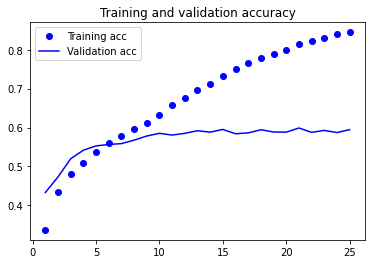

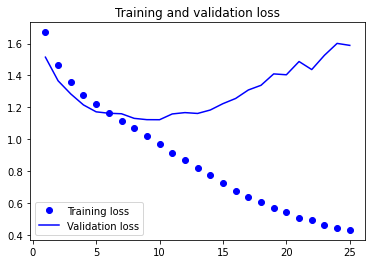

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('gdrive/My Drive/reduce_layers_1.png', dpi=100)
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('gdrive/My Drive/reduce_layers_2.png', dpi=100)
plt.show()

In [ ]:
#IMFDB Data conversion to CSV file
#Convert the images into pixels string with eomtions tag

In [ ]:
#To resize and crop the images precisely  
!pip install python-resize-image

In [ ]:
import sys, os, glob
import pandas as pd
import numpy as np
import pathlib
import csv 
from PIL import Image
from resizeimage import resizeimage
import random

In [ ]:
rootPath = '/content/gdrive/My Drive/'

IMFDB_final_path = rootPath + 'IMFDB_final'
IMFDB_CSV_path = rootPath + 'IMFDB_CSV'
IMFDB_final = pathlib.Path(IMFDB_final_path)

In [ ]:
emotionsNumber = { "ANGER":0 , "DISGUST":1 , "FEAR":2 , "HAPPINESS":3 , "SADNESS":4 , "SURPRISE":5 , "NEUTRAL":6  }
def getEmotionNumber(emotion):
  try:
    return emotionsNumber[emotion]
  except:
    return -1

In [ ]:
def fileExits(path):
  my_file = pathlib.Path(path)
  if my_file.is_file():
    return True
  else:
    return False

In [ ]:
def isDir(path):
  my_file = pathlib.Path(path)
  if my_file.is_dir():
    return True
  else:
    return False

In [ ]:
def getFilePath(moviePath,actorName,movieName):
  try:
    os.chdir(moviePath)
    for file in glob.glob("*.txt"):
      return file
  except:
    print("Text File Not Found -- Ignored")
    return False

In [ ]:
def checkCSVCreated(ActorName):
  csvPath = IMFDB_CSV_path + '/' + ActorName + ".csv"
  return fileExits(csvPath)

In [ ]:
def getEmotionsFromFile(path):
  file = open(filePath, 'r') 
  Lines = file.readlines()
  emotions = {}
  for line in Lines:
    keys = line.split("\t")
    if(len(keys)>11):
      emotions[keys[2]] = keys[11]
  return emotions

In [ ]:
def getResizeImage(path):
  try:
    fd_img = open(path, 'rb')
    img = Image.open(fd_img).convert('LA')
    img = resizeimage.resize_cover(img, [48, 48])
    fd_img.close()
    return img
  except:
    print("Image Very Small -- Ignored")
    return False

In [ ]:
def getRandomTag():
  if random.uniform(0, 1) < 0.3 :
    return "PublicTest"
  else :
    return "Training"

In [ ]:
def createCSV(dataArray,actorName):
  if len(dataArray) == 0:
    print("Data Missing for **" + actorName + "** -- Ignored")
    return
  csvPath = IMFDB_CSV_path + '/' + actorName + ".csv"
  data = np.array(dataArray)
  dataset = pd.DataFrame({'emotion':data[:,0] , 'pixels': data[:, 1], 'Usage': data[:, 2]})
  dataset.to_csv(csvPath, index = False)

In [ ]:
for actor in IMFDB_final.glob('*'):
  dataArray = []
  if checkCSVCreated(actor.name): continue
  print("start -- " + actor.name)
  for movie in actor.glob('*'):
    moviePath = IMFDB_final_path + "/" + actor.name + "/" + movie.name
    if not isDir(moviePath): continue
    imagesPath = moviePath + "/images/"
    filePath = getFilePath(moviePath,actor.name,movie.name)
    if not filePath: continue
    emotions = getEmotionsFromFile(filePath)
    for key in emotions:
      emotionNo = getEmotionNumber(emotions[key])
      if emotionNo == -1: continue
      imagePath = imagesPath + key
      print(imagePath)
      img = getResizeImage(imagePath)
      if not img: continue
      imgArrayFull = np.asarray(img).flatten()
      imgArray = imgArrayFull[::2]
      pixel_list = imgArray.tolist()
      pixel_str_list = map(str, pixel_list)
      img_str = ' '.join(pixel_str_list)
      data = []
      data.append(emotionNo)
      data.append(img_str)
      data.append("Training")
      dataArray.append(data)
  createCSV(dataArray,actor.name)

In [ ]:
os.chdir(IMFDB_CSV_path)
frames = []
for file in glob.glob("*.csv"):
  filePath = IMFDB_CSV_path + "/" + file
  df =  pd.read_csv(filePath)
  frames.append(df)
df = pd.concat(frames)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24596 entries, 0 to 96
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  24596 non-null  int64 
 1   pixels   24596 non-null  object
 2   Usage    24596 non-null  object
dtypes: int64(1), object(2)
memory usage: 768.6+ KB


In [ ]:
allFilePath = IMFDB_CSV_path + "/IMFDB.csv" 
df.to_csv(allFilePath, index = False)

In [ ]:
data = np.array(dataArray)
dataset = pd.DataFrame({'emotion':data[:,0] , 'pixels': data[:, 1], 'Usage': data[:, 2]})
dataset.to_csv(r'/content/gdrive/My Drive/IMFDB_1.csv', index = False)
#end

In [ ]:
#Application to select Image and predict emotion
#Webcame can also be use to see the emotion live

In [ ]:
import tkinter as tk
from PIL import ImageTk, Image
from tkinter import filedialog
import numpy as np
import tensorflow
from tensorflow.keras.preprocessing.image import img_to_array
from keras.models import model_from_json
from keras.preprocessing import image
import cv2

model = model_from_json(open("model/model.json", "r").read())
model.load_weights('model/model.h5')
face_haar_cascade = cv2.CascadeClassifier('model/haarcascade_frontalface_default.xml')
cap = cv2.VideoCapture(0)

live_tab = False
after_id = 0

def load_splash():
    global img
    for img_display in frame.winfo_children():
        img_display.destroy()
    img = Image.open("assets/splash.jpg")
    basewidth = 600
    wpercent = (basewidth / float(img.size[0]))
    hsize = int((float(img.size[1] * float(wpercent))))
    img = img.resize((basewidth, hsize), Image.ANTIALIAS)
    img = ImageTk.PhotoImage(img)
    panel_image = tk.Label(frame, image=img).pack()

def load_img():
    global img, img_data
    for img_display in frame.winfo_children():
        img_display.destroy()
    img_data = filedialog.askopenfilename(initialdir="/", title="Choose Image", filetypes=(("all files", "*.*"), ("png files", "*.png")))
    img = cv2.imread(img_data)
    img = emotion(img)
    img = image_resize(img)
    b,g,r = cv2.split(img)
    img = cv2.merge((r,g,b))
    im = Image.fromarray(img)
    img = ImageTk.PhotoImage(image=im)
    file_name = img_data.split('/')
    panel = tk.Label(frame, text=str(file_name[len(file_name) -1]).upper()).pack()
    panel_image = tk.Label(frame, image=img).pack()

def live_img():
    global img, img_data,after_id
    for img_display in frame.winfo_children():
        img_display.destroy()
    _, cam_img = cap.read()
    img = emotion(cam_img)
    b,g,r = cv2.split(img)
    img = cv2.merge((r,g,b))
    im = Image.fromarray(img)
    img = ImageTk.PhotoImage(image=im)
    panel = tk.Label(frame, text="Live Cam").pack()
    panel_image = tk.Label(frame, image=img).pack()
    after_id = frame.after(10, live_img)

def live_setup():
    global live_tab,after_id;
    if live_tab:
        load_splash()
        live_btn_text.set("Live")
        frame.after_cancel(after_id)
        live_tab = False
    else:
        live_btn_text.set("Stop")
        live_img()
        live_tab = True
        
    
def emotion(img):
    gray_img= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces_detected = face_haar_cascade.detectMultiScale(gray_img, 1.32, 5)
    for (x,y,w,h) in faces_detected:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),thickness=7)
        roi_gray=gray_img[y:y+w,x:x+h]#cropping region of interest i.e. face area from  image
        roi_gray=cv2.resize(roi_gray,(48,48))
        img_pixels = image.img_to_array(roi_gray)
        img_pixels = np.expand_dims(img_pixels, axis = 0)
        img_pixels /= 255
        predictions = model.predict(img_pixels)
        max_index = np.argmax(predictions[0])
        emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
        predicted_emotion = emotions[max_index]
        cv2.putText(img, predicted_emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
    resized_img = img
    return resized_img

def image_resize(im, inter = cv2.INTER_AREA):
    h, w, c = im.shape
    if w > h:
        r = 600 / w
    else:
        r = 480 / h
        
    width = int(im.shape[1] * r)
    height = int(im.shape[0] * r)
    dim = (width, height)
    resized = cv2.resize(im, dim)
    return resized


root = tk.Tk()
root.title('EMOTIONS')
root.iconbitmap("assets/ico.ico")
root.resizable(False, False)

canvas = tk.Canvas(root, height=480, width=600, bg='white')
canvas.pack()

frame = tk.Frame(root, bg='white')
frame.place(relwidth=1, relheight=1, relx=0, rely=0)

img_btn = tk.Button(root, text='Select Image', padx=35, pady=10, command=load_img)
img_btn.pack(side=tk.LEFT)
live_btn_text = tk.StringVar()
live_btn_text.set("Live")
live_btn = tk.Button(root, textvariable=live_btn_text, padx=35, pady=10,command=live_setup)
live_btn.pack(side=tk.RIGHT)

load_splash()
root.mainloop()
